In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

file = tf.keras.utils

dataframe = pd.read_csv(r'C:\Users\Susara\Documents\ANN\H1.csv' )



In [3]:

train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')


25638 train examples
6410 validation examples
8012 test examples


In [9]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  dataframe = dataframe.dropna()
  labels = dataframe.pop('ADR')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds



Make feature colomn 

In [5]:
feature_columns = []

# numeric cols
for header in ['LeadTime','Adults','Children','Babies', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth']:
  feature_columns.append(feature_column.numeric_column(header))

MarketSegment = feature_column.categorical_column_with_vocabulary_list(
      'MarketSegment', ['Direct', 'Corporate', 'Online TA', 'Offline TA/TO'])
MarketSegment_one_hot = feature_column.indicator_column(MarketSegment)
feature_columns.append(MarketSegment_one_hot)

MarketSegment_embedding = feature_column.embedding_column(MarketSegment, dimension=4)
feature_columns.append(MarketSegment_embedding)

CustomerType = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party'])
CustomerType_one_hot = feature_column.indicator_column(CustomerType)
feature_columns.append(CustomerType_one_hot)

CustomerType_embedding = feature_column.embedding_column(CustomerType, dimension=3)
feature_columns.append(CustomerType_embedding)

Meal = feature_column.categorical_column_with_vocabulary_list(
      'Meal', ['BB', 'FB', 'HB'])
Meal_one_hot = feature_column.indicator_column(Meal)
feature_columns.append(Meal_one_hot)

Meal_embedding = feature_column.embedding_column(Meal, dimension=3)
feature_columns.append(Meal_embedding)


ArrivalDateMonth = feature_column.categorical_column_with_vocabulary_list(
      'ArrivalDateMonth', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ArrivalDateMonth_one_hot = feature_column.indicator_column(ArrivalDateMonth)
feature_columns.append(ArrivalDateMonth_one_hot)

ArrivalDateMonth_embedding = feature_column.embedding_column(ArrivalDateMonth, dimension=12)
feature_columns.append(ArrivalDateMonth_embedding)


ReservedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'ReservedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'])
ReservedRoomType_one_hot = feature_column.indicator_column(ReservedRoomType)
feature_columns.append(ReservedRoomType_one_hot)

ReservedRoomType_embedding = feature_column.embedding_column(ReservedRoomType, dimension=9)
feature_columns.append(ReservedRoomType_embedding)




In [6]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


Multi Layer Perceptron

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Epoch 1/100
792/792 [==============================] - 30s 37ms/step - loss: 1909.9332 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
792/792 [==============================] - 19s 24ms/step - loss: 1123.4042 - accuracy: 0.0000e+00 - val_loss: 1085.0240 - val_accuracy: 0.0000e+00
Epoch 3/100
792/792 [==============================] - 20s 25ms/step - loss: 1071.2486 - accuracy: 0.0000e+00 - val_loss: 1051.8461 - val_accuracy: 0.0000e+00
Epoch 4/100
792/792 [==============================] - 19s 24ms/step - loss: 1034.3209 - accuracy: 0.0000e+00 - val_loss: 1077.7460 - val_accuracy: 0.0000e+00
Epoch 5/100
792/792 [==============================] - 17s 22ms/step - loss: 1015.3233 - accuracy: 0.0000e+00 - val

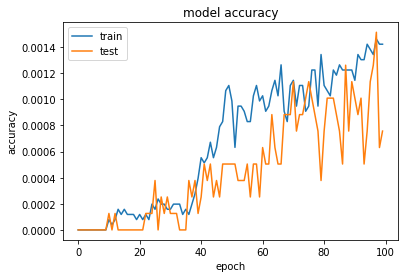

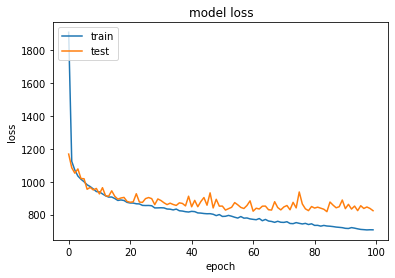

In [7]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=test_ds,epochs=100)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()